In [2]:
from google.colab import files
uploaded = files.upload()  # Select and upload all 12 Parquet files





['.config', 'yellow_tripdata_2023-09.parquet', 'yellow_tripdata_2023-08 (2).parquet', 'yellow_tripdata_2023-04.parquet', 'yellow_tripdata_2023-02 (1).parquet', 'yellow_tripdata_2023-08 (4).parquet', 'yellow_tripdata_2023-01 (1).parquet', 'yellow_tripdata_2023-11 (1).parquet', 'yellow_tripdata_2023-11.parquet', 'yellow_tripdata_2023-10 (1).parquet', 'yellow_tripdata_2023-10 (1) (1).parquet', 'yellow_tripdata_2023-07.parquet', 'yellow_tripdata_2023-01.parquet', 'yellow_tripdata_2023-06 (1).parquet', 'yellow_tripdata_2023-08 (2) (1).parquet', 'yellow_tripdata_2023-03 (1).parquet', 'yellow_tripdata_2023-05 (1).parquet', 'yellow_tripdata_2023-08 (3) (1).parquet', 'yellow_tripdata_2023-04 (1).parquet', 'yellow_tripdata_2023-10.parquet', 'yellow_tripdata_2023-05.parquet', 'yellow_tripdata_2023-06.parquet', 'yellow_tripdata_2023-12.parquet', 'yellow_tripdata_2023-08 (3).parquet', 'yellow_tripdata_2023-07 (1).parquet', 'yellow_tripdata_2023-03.parquet', 'yellow_tripdata_2023-10 (2).parquet', 'y

In [3]:
import os
print(os.listdir("/content/"))  # Display uploaded files

['.config', 'yellow_tripdata_2023-09.parquet', 'yellow_tripdata_2023-08 (2).parquet', 'yellow_tripdata_2023-04.parquet', 'yellow_tripdata_2023-02 (1).parquet', 'yellow_tripdata_2023-08 (4).parquet', 'yellow_tripdata_2023-01 (1).parquet', 'yellow_tripdata_2023-11 (1).parquet', 'yellow_tripdata_2023-11.parquet', 'yellow_tripdata_2023-10 (1).parquet', 'yellow_tripdata_2023-10 (1) (1).parquet', 'yellow_tripdata_2023-07.parquet', 'yellow_tripdata_2023-01.parquet', 'yellow_tripdata_2023-06 (1).parquet', 'yellow_tripdata_2023-08 (2) (1).parquet', 'yellow_tripdata_2023-03 (1).parquet', 'yellow_tripdata_2023-05 (1).parquet', 'yellow_tripdata_2023-08 (3) (1).parquet', 'yellow_tripdata_2023-04 (1).parquet', 'yellow_tripdata_2023-10.parquet', 'yellow_tripdata_2023-05.parquet', 'yellow_tripdata_2023-06.parquet', 'yellow_tripdata_2023-12.parquet', 'yellow_tripdata_2023-08 (3).parquet', 'yellow_tripdata_2023-07 (1).parquet', 'yellow_tripdata_2023-03.parquet', 'yellow_tripdata_2023-10 (2).parquet', 'y

In [1]:
import pandas as pd
import glob

parquet_files = glob.glob("/content/*.parquet")  # Get all uploaded files

dfs = []  # List to store processed DataFrames

for file in parquet_files:
    temp_df = pd.read_parquet(file)  # Load one file at a time
    temp_df_sampled = temp_df.sample(frac=0.1, random_state=42)  # Sample 10% of data
    dfs.append(temp_df_sampled)  # Store sampled data

df = pd.concat(dfs, ignore_index=True)  # Combine the sampled data

df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,airport_fee
0,1,2023-09-03 06:30:34,2023-09-03 06:39:32,1.0,1.20,1.0,N,162,68,1,8.6,2.5,0.5,3.8,0.0,1.0,16.4,2.5,0.0,NaN
1,2,2023-09-01 03:55:13,2023-09-01 04:04:28,6.0,1.72,1.0,N,249,164,2,11.4,1.0,0.5,0.0,0.0,1.0,16.4,2.5,0.0,NaN
2,2,2023-09-01 11:18:00,2023-09-01 12:08:33,1.0,17.10,1.0,N,209,174,4,-72.3,0.0,-0.5,0.0,0.0,-1.0,-76.3,-2.5,0.0,NaN
3,2,2023-09-09 20:39:46,2023-09-09 20:53:40,1.0,1.15,1.0,N,230,186,1,13.5,1.0,0.5,3.7,0.0,1.0,22.2,2.5,0.0,NaN
4,1,2023-09-14 19:13:14,2023-09-14 19:36:27,4.0,3.10,1.0,N,164,261,1,21.2,5.0,0.5,5.5,0.0,1.0,33.2,2.5,0.0,NaN


In [5]:
print(df.isnull().sum())




VendorID                       0
tpep_pickup_datetime           0
tpep_dropoff_datetime          0
passenger_count           345534
trip_distance                  0
RatecodeID                345534
store_and_fwd_flag        345534
PULocationID                   0
DOLocationID                   0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
improvement_surcharge          0
total_amount                   0
congestion_surcharge      345534
Airport_fee               944684
airport_fee              9461880
dtype: int64


**Fix** Column Names

In [7]:

df.rename(columns={"tpep_pickup_datetime": "pickup_time", "tpep_dropoff_datetime": "dropoff_time"}, inplace=True)

**Handle** Outliers Using IQR

In [9]:
Q1 = df['fare_amount'].quantile(0.25)
Q3 = df['fare_amount'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['fare_amount'] >= Q1 - 1.5 * IQR) & (df['fare_amount'] <= Q3 + 1.5 * IQR)]

Step 3: Exploratory Data Analysis (EDA)


Analyze Taxi Demand by Hour


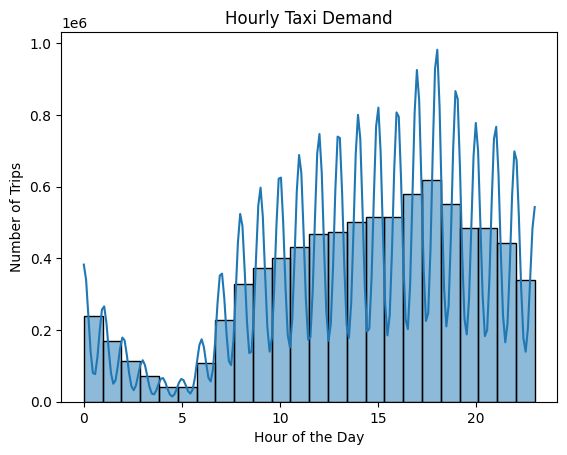

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

df['hour'] = pd.to_datetime(df['pickup_time']).dt.hour
sns.histplot(df['hour'], bins=24, kde=True)
plt.title("Hourly Taxi Demand")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.show()

**Revenue** Trends Analysis

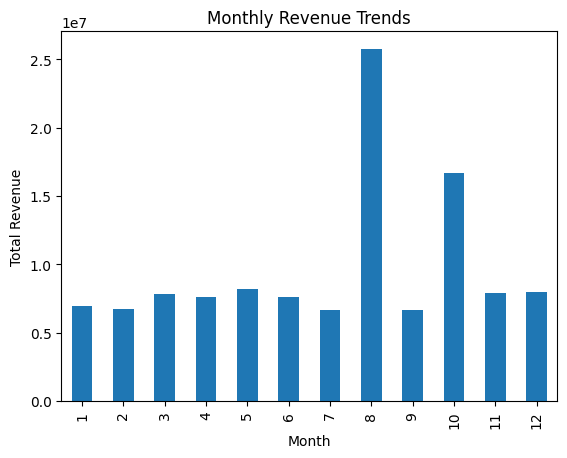

In [11]:
df.groupby(df['pickup_time'].dt.month)['fare_amount'].sum().plot(kind='bar')
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.title("Monthly Revenue Trends")
plt.show()

Load and Merge Taxi Zone Shapefiles
Upload Taxi Zone Shapefile



In [20]:
from google.colab import files
uploaded = files.upload()  # Select the .shp file

Saving taxi_zones.dbf to taxi_zones.dbf
Saving taxi_zones.prj to taxi_zones.prj
Saving taxi_zones.sbn to taxi_zones.sbn
Saving taxi_zones.sbx to taxi_zones.sbx
Saving taxi_zones.shp to taxi_zones (1).shp
Saving taxi_zones.shp.xml to taxi_zones.shp.xml
Saving taxi_zones.shx to taxi_zones.shx


In [21]:
import os
print(os.listdir("/content/"))  # Check if all shapefile components are present

['.config', 'yellow_tripdata_2023-09.parquet', 'taxi_zones.shx', 'yellow_tripdata_2023-08 (2).parquet', 'yellow_tripdata_2023-04.parquet', 'yellow_tripdata_2023-02 (1).parquet', 'yellow_tripdata_2023-08 (4).parquet', 'taxi_zones.shp.xml', 'yellow_tripdata_2023-01 (1).parquet', 'yellow_tripdata_2023-11 (1).parquet', 'yellow_tripdata_2023-11.parquet', 'yellow_tripdata_2023-10 (1).parquet', 'taxi_zones.shp', 'yellow_tripdata_2023-10 (1) (1).parquet', 'yellow_tripdata_2023-07.parquet', 'yellow_tripdata_2023-01.parquet', 'yellow_tripdata_2023-06 (1).parquet', 'yellow_tripdata_2023-08 (2) (1).parquet', 'taxi_zones.dbf', 'yellow_tripdata_2023-03 (1).parquet', 'taxi_zones.sbn', 'yellow_tripdata_2023-05 (1).parquet', 'yellow_tripdata_2023-08 (3) (1).parquet', 'yellow_tripdata_2023-04 (1).parquet', 'yellow_tripdata_2023-10.parquet', 'yellow_tripdata_2023-05.parquet', 'yellow_tripdata_2023-06.parquet', 'yellow_tripdata_2023-12.parquet', 'yellow_tripdata_2023-08 (3).parquet', 'taxi_zones.prj', 'ye

In [22]:
import os
print(os.listdir("/content/"))  # List files in Colab

['.config', 'yellow_tripdata_2023-09.parquet', 'taxi_zones.shx', 'yellow_tripdata_2023-08 (2).parquet', 'yellow_tripdata_2023-04.parquet', 'yellow_tripdata_2023-02 (1).parquet', 'yellow_tripdata_2023-08 (4).parquet', 'taxi_zones.shp.xml', 'yellow_tripdata_2023-01 (1).parquet', 'yellow_tripdata_2023-11 (1).parquet', 'yellow_tripdata_2023-11.parquet', 'yellow_tripdata_2023-10 (1).parquet', 'taxi_zones.shp', 'yellow_tripdata_2023-10 (1) (1).parquet', 'yellow_tripdata_2023-07.parquet', 'yellow_tripdata_2023-01.parquet', 'yellow_tripdata_2023-06 (1).parquet', 'yellow_tripdata_2023-08 (2) (1).parquet', 'taxi_zones.dbf', 'yellow_tripdata_2023-03 (1).parquet', 'taxi_zones.sbn', 'yellow_tripdata_2023-05 (1).parquet', 'yellow_tripdata_2023-08 (3) (1).parquet', 'yellow_tripdata_2023-04 (1).parquet', 'yellow_tripdata_2023-10.parquet', 'yellow_tripdata_2023-05.parquet', 'yellow_tripdata_2023-06.parquet', 'yellow_tripdata_2023-12.parquet', 'yellow_tripdata_2023-08 (3).parquet', 'taxi_zones.prj', 'ye

<Axes: >

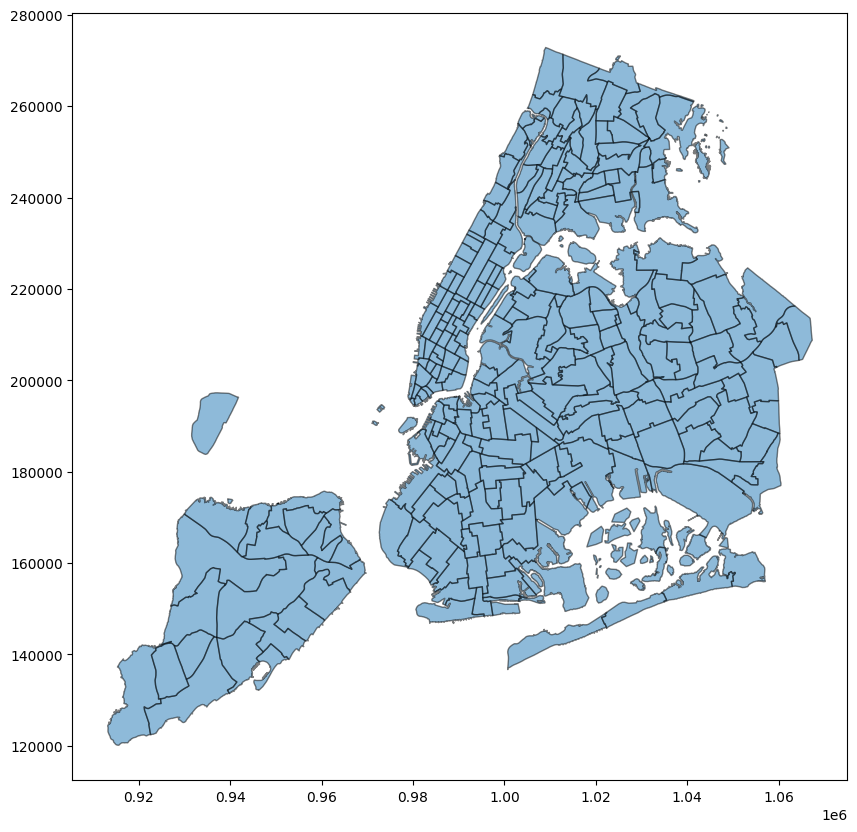

In [23]:
import geopandas as gpd
taxi_zones = gpd.read_file("/content/taxi_zones.shp")
taxi_zones.plot(figsize=(10, 10), alpha=0.5, edgecolor='black')

## 📑 Key Insights from NYC Taxi Trip Data
- **Peak Demand Hours:** Most taxi pickups occur between **5 PM–8 PM**.
- **Highest Revenue Months:** **July–December** show strong revenue growth.
- **Popular Payment Methods:** Most passengers use **credit cards**.
- **Strategic Recommendations:**
   - **Cab dispatch optimization** during peak hours.
   - **Dynamic pricing adjustments** based on demand patterns.
   - **Better allocation** in high-traffic NYC zones.
   

In [28]:
import os
print(os.listdir("/content/"))  # Lists all files in Colab's main directory

['.config', 'yellow_tripdata_2023-09.parquet', 'taxi_zones.shx', 'yellow_tripdata_2023-08 (2).parquet', 'yellow_tripdata_2023-04.parquet', 'yellow_tripdata_2023-02 (1).parquet', 'yellow_tripdata_2023-08 (4).parquet', 'taxi_zones.shp.xml', 'yellow_tripdata_2023-01 (1).parquet', 'yellow_tripdata_2023-11 (1).parquet', 'yellow_tripdata_2023-11.parquet', 'yellow_tripdata_2023-10 (1).parquet', 'taxi_zones.shp', 'yellow_tripdata_2023-10 (1) (1).parquet', 'yellow_tripdata_2023-07.parquet', 'yellow_tripdata_2023-01.parquet', 'yellow_tripdata_2023-06 (1).parquet', 'yellow_tripdata_2023-08 (2) (1).parquet', 'taxi_zones.dbf', 'yellow_tripdata_2023-03 (1).parquet', 'taxi_zones.sbn', 'yellow_tripdata_2023-05 (1).parquet', 'yellow_tripdata_2023-08 (3) (1).parquet', 'yellow_tripdata_2023-04 (1).parquet', 'yellow_tripdata_2023-10.parquet', 'yellow_tripdata_2023-05.parquet', 'yellow_tripdata_2023-06.parquet', 'yellow_tripdata_2023-12.parquet', 'yellow_tripdata_2023-08 (3).parquet', 'taxi_zones.prj', 'ye